# Sample ipynb for finance data regression

This is a sample ipynb file that allow to download historical data from Yahoo Finance and to test regression models on thata data to predict quotes.

Install required package to download data from Yahoo Finance

In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=e90a7c2e519ff11d7c8b021a066544b04b710ee93233d010ea8dd07717b44cd6
  Stored in directory: /root/.cache/pip/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


Loading required libraries:

In [0]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

import numpy as np
import pandas as pd

from sklearn import preprocessing

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(16, 10))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Loading data with yfinance for Ferrari (RACE) quotes.
Consider that this piece of code allows you to download programmatically data from Yahoo Finance, without using csv download

In [4]:
df = pdr.get_data_yahoo("RACE", start="2016-09-01", end="2019-09-01")
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-01,48.27,48.59,47.93,48.32,47.12,305900
2016-09-02,48.25,48.59,48.06,48.50,47.30,428300
2016-09-06,48.25,48.72,48.25,48.67,47.46,364200
2016-09-07,49.55,50.09,49.30,49.76,48.53,389400
2016-09-08,49.10,49.71,48.94,49.47,48.24,368900


Creating a new dataframe with different columns, 

```
"Adj Close","Volume","HL_PCT","PCT_change"
```

 

In [7]:
dfreg = df.loc[:,["Adj Close","Volume"]]
dfreg["HL_PCT"] = (df["High"] - df["Low"]) / df["Close"] * 100.0
dfreg["PCT_change"] = (df["Close"] - df["Open"]) / df["Open"] * 100.0
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2016-09-01,47.12,305900,1.365894,0.103584
2016-09-02,47.30,428300,1.092784,0.518135
2016-09-06,47.46,364200,0.965687,0.870466
2016-09-07,48.53,389400,1.587621,0.423814
2016-09-08,48.24,368900,1.556499,0.753564


No cleaning is necessary because there are no null values in the new dataframe

In [8]:
print(dfreg.isnull().values.any())
# Drop missing value
#dfreg.fillna(value=-99999, inplace=True)


False


Trying to forecast "Adj Close" for 1% of data and then skipping the last 1% of data (that hence has no forecast available)

In [0]:
forecast_out = int(np.ceil(0.01 * len(dfreg)))
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
dfreg = dfreg[:-forecast_out]

Taking a 5% of data as test data and scaling X data, obtaining X_train, y_train, X_test, y_test

In [0]:
test_pct = int(np.ceil(0.05 * len(dfreg)))
X = np.array(dfreg.drop(['label'], 1))
X = preprocessing.scale(X)
X_test = X[-test_pct:]
X_train = X[:-test_pct]
y = np.array(dfreg['label'])
y_test = y[-test_pct:]
y_train = y[:-test_pct]

Defining a function that fit a regression model and, print its score and then plots real and predicted test values

In [0]:
def fit_and_plot(model, X_train, y_train, X_test, y_test, xindex):
  model.fit(X_train, y_train)
  print("Score: ", model.score(X_test, y_test))
  plt.figure()
  plt.plot(xindex, model.predict(X_test), label='pred')
  plt.plot(xindex, y_test, label='real')
  plt.xticks(rotation=45)
  l = plt.legend()

## Results

The model performing better is LinearRegression.

MODEL:  LinearRegression
Score:  -1.0333959431206


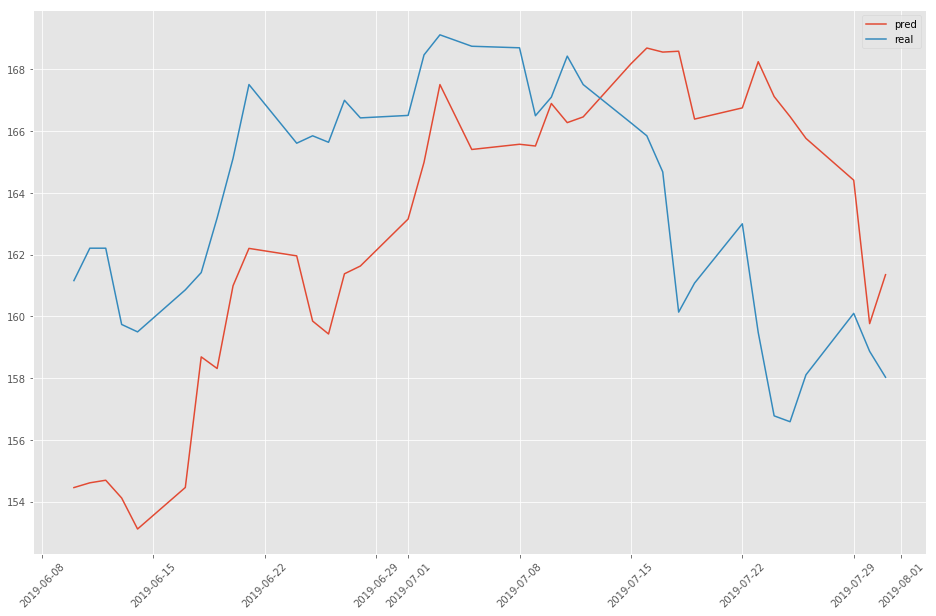

In [55]:
print("MODEL: ", "LinearRegression")
fit_and_plot(LinearRegression(), X_train, y_train, X_test, y_test, dfreg.index[-test_pct:])

MODEL:  SupportVectorRegressor
Score:  -65.38874272183759


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


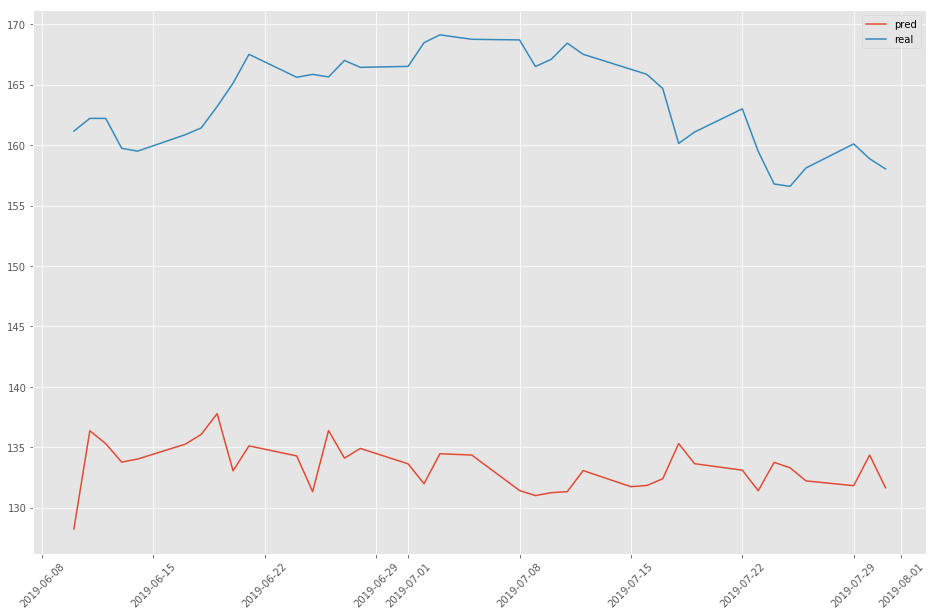

In [56]:
print("MODEL: ", "SupportVectorRegressor")
fit_and_plot(SVR(), X_train, y_train, X_test, y_test, dfreg.index[-test_pct:])

MODEL:  MLPRegressor


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score:  -44.641358924950374


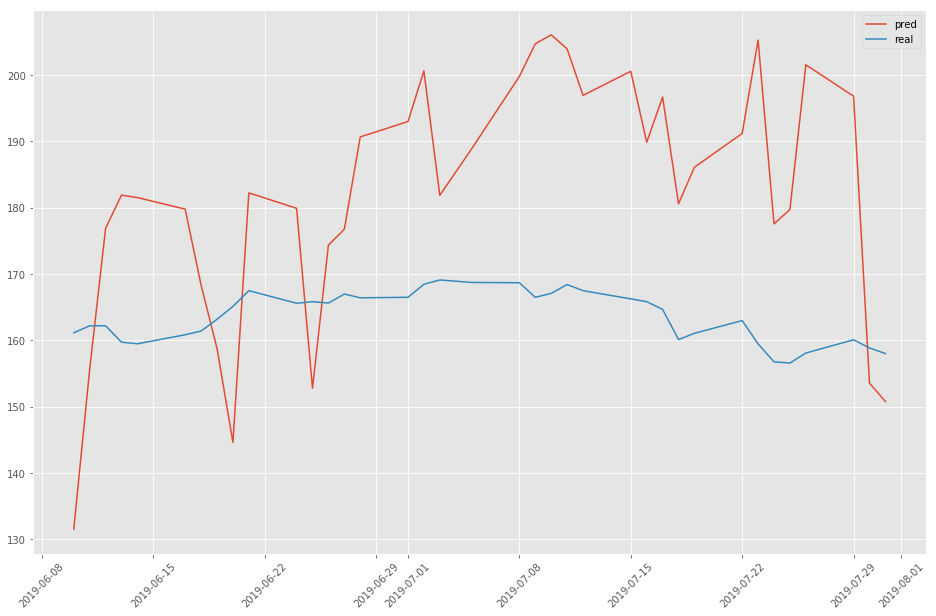

In [57]:
print("MODEL: ", "MLPRegressor")
fit_and_plot(MLPRegressor(), X_train, y_train, X_test, y_test, dfreg.index[-test_pct:])

MODEL:  KernelRidge
Score:  -1263.84299701441


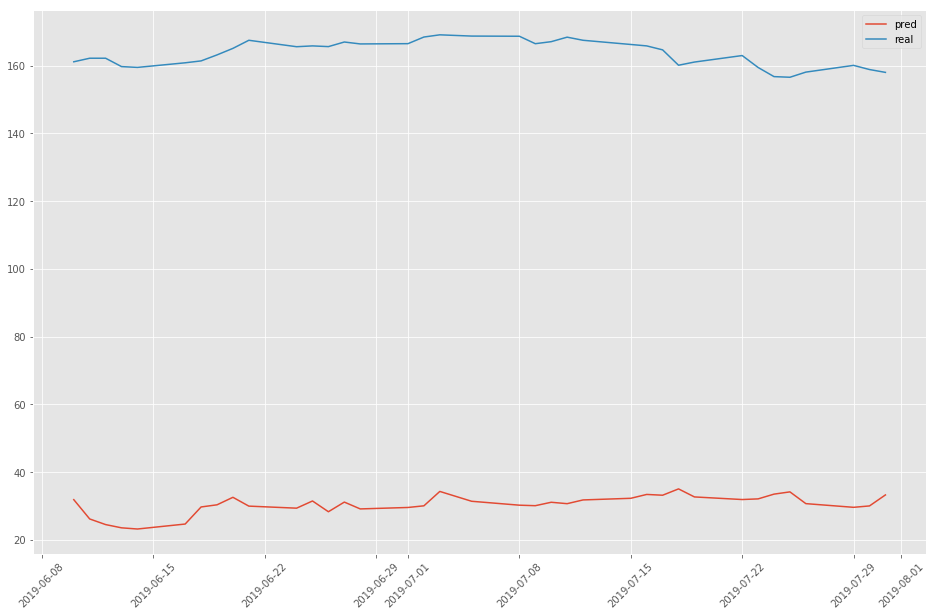

In [58]:
print("MODEL: ", "KernelRidge")
fit_and_plot(KernelRidge(), X_train, y_train, X_test, y_test, dfreg.index[-test_pct:])

MODEL:  KNeighborsRegressor
Score:  -36.6419838236865


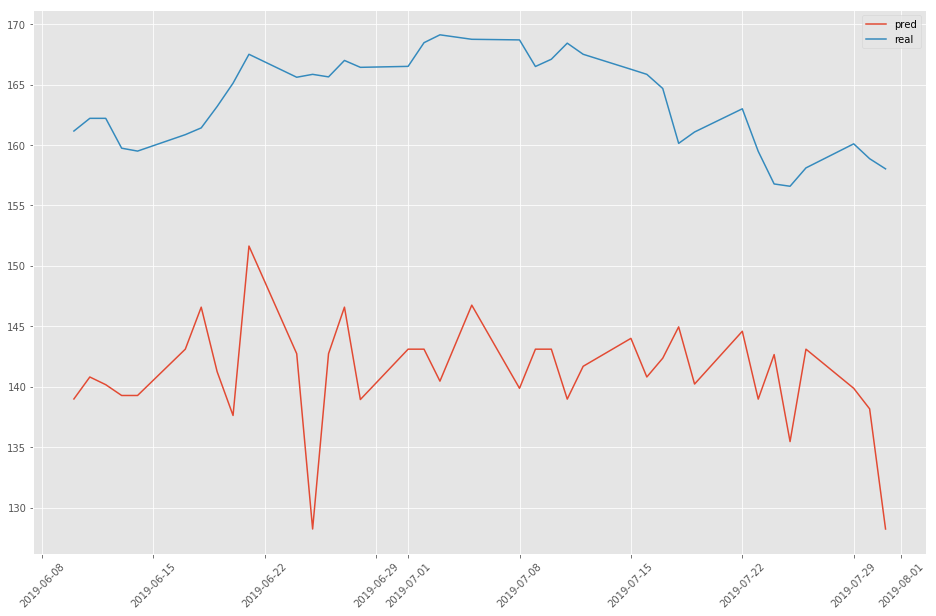

In [59]:
print("MODEL: ", "KNeighborsRegressor")
fit_and_plot(KNeighborsRegressor(), X_train, y_train, X_test, y_test, dfreg.index[-test_pct:])

MODEL:  DecisionTreeRegressor
Score:  -23.314352044846252


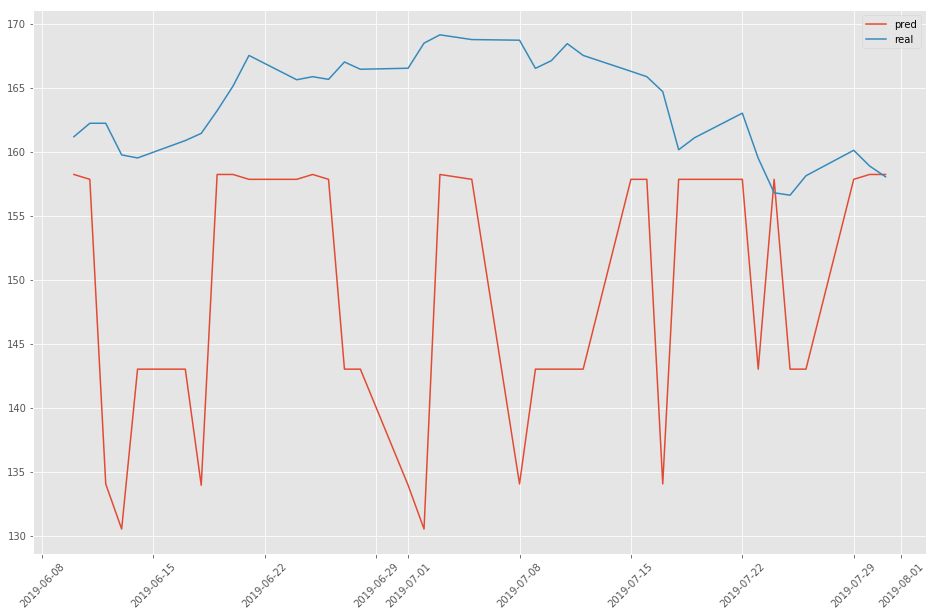

In [60]:
print("MODEL: ", "DecisionTreeRegressor")
fit_and_plot(DecisionTreeRegressor(), X_train, y_train, X_test, y_test, dfreg.index[-test_pct:])

MODEL:  Polynomial
Score:  -1.2590257495944277


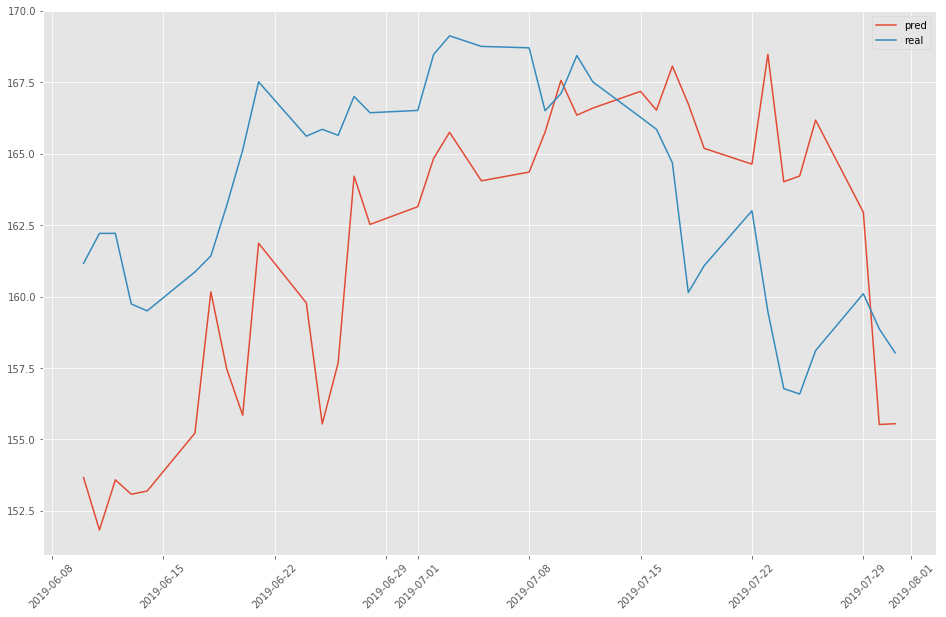

In [61]:
print("MODEL: ", "Polynomial")
fit_and_plot(make_pipeline(PolynomialFeatures(3), Ridge()), X_train, y_train, X_test, y_test, dfreg.index[-test_pct:])